Proyek Analisis Data: Bike Sharing Database

Nama: Azza Wafiqurrohmah
Email: wafiqurrohmahazza@gmail.com
ID Dicoding: MC129D5X1966

Pertanyaan bisnis :
1. Seberapa besar pengaruh perbedaan musim terhadap jumlah pelanggan bike sharing?
2. Bagaimana pola penggunaan sepeda antara pengguna casual dan registered berdasarkan jam dalam sehari? Apakah ada perbedaan signifikan dalam pola pemakaian mereka?

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A. Data Wrangling
   1. Gathering data

In [308]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

2. Accessing Data

In [309]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Insight: 
1. data day_df ini memiliki sebanyak 731 entry data
2. seluruh data memiliki nilai non-null
3. namun sepertinya terdapat kesalahan dalam tipe data dari dteday, yg harusnya berupa datetime bukan object 

In [310]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Insight: 
1. data hour_df ini memiliki sebanyak 17379 entry data
2. seluruh data memiliki nilai non-null
3. sama seperti sebelumnya, terdapat kesalahan dalam tipe data dari dteday, yg harusnya berupa datetime bukan object 

In [311]:
pd.options.display.float_format = '{:.0f}'.format
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731
mean,366,2,1,7,0,3,1,1,0,0,1,0,848,3656,4504
std,211,1,1,3,0,2,0,1,0,0,0,0,687,1560,1937
min,1,1,0,1,0,0,0,1,0,0,0,0,2,20,22
25%,184,2,0,4,0,1,0,1,0,0,1,0,316,2497,3152
50%,366,3,1,7,0,3,1,1,0,0,1,0,713,3662,4548
75%,548,3,1,10,0,5,1,2,1,1,1,0,1096,4776,5956
max,731,4,1,12,1,6,1,3,1,1,1,1,3410,6946,8714


In [312]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379
mean,8690,3,1,7,12,0,3,1,1,0,0,1,0,36,154,189
std,5017,1,1,3,7,0,2,0,1,0,0,0,0,49,151,181
min,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
25%,4346,2,0,4,6,0,1,0,1,0,0,0,0,4,34,40
50%,8690,3,1,7,12,0,3,1,1,0,0,1,0,17,115,142
75%,13034,3,1,10,18,0,5,1,2,1,1,1,0,48,220,281
max,17379,4,1,12,23,1,6,1,4,1,1,1,1,367,886,977


In [313]:
day_df.duplicated().sum()
hour_df.duplicated().sum()

0

insight:
  - kedua data tersebut tidak memiliki duplikasi data

3. Cleaning data
   - berdasarkan dari apa yang saya lakukan pada tahap accessing data, terdapat dua kesalahan pada dua tebal tersebut, yaitu keduanya sama memiliki tipe data yang salah pada kolom dtday

In [314]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [315]:
df_list = [day_df, hour_df]
for df in df_list: 
    df["season"] = df["season"].apply(lambda x: "springer" if x == 1 else ("summer" if x == 2 else ("fall" if x == 3 else "winter")))

B. Exploratory Data Analys ( EDA )
1. Dimulai dengan mengekplorasi pengaruh perbedaan musim terhadap jumlah pelanggan, sesuai dengan pertanyaan bisnis yang pertama


In [316]:
season_df = hour_df.groupby('season').agg({
    'cnt': ['mean']
})

insight:
1. Rata-rata pelanggan cukup jauh, seperti pada musing spring yang memiliki rta2 hanya 111 pelanggan, sedangkan pada musim gugur pelanggan jauh lebih banyak dengan rata2 hinggan 236 pelanggan
2. Nilai maks dari smua musim hampir sama, artinya kemungkinan pada tiap musim itu memang terdapat beberapa hari dimana banyak pelanggan yang menggunakan bike sharing, bisa dikarekan hari libur, hari kerja, atau hal lainnya
3. Nilai min dari smua musim sama, yaitu hanya satu pelanggan. Artinya, disemua musim hampir dipastikan ada pelanggan yang menggunakan bike sharing, tidak mungkin tidak

2. melanjutkan analisis pada pertanyaan ke dua : "Bagaimana pola penggunaan sepeda antara pengguna casual dan registered berdasarkan jam dalam sehari? Apakah ada perbedaan signifikan dalam pola pemakaian mereka?"

In [317]:
hour_in_days_df = pd.merge(
    left=day_df,
    right=hour_df,
    how='left',
    left_on="dteday",
    right_on="dteday"
)[['season_x', 'dteday', 'hr', 'casual_y', 'registered_y', 'cnt_y', 'cnt_x']]

hour_in_days_df = hour_in_days_df.rename(columns={
    'season_x': 'season_day',
    'hr': 'hour',
    'casual_y': 'casual_hour',
    'registered_y': 'registered_hour',
    'cnt_y': 'count_hour',
    'cnt_x': 'count_day'
})

hour_in_days_df.head()

,season_day,dteday,hour,casual_hour,registered_hour,count_hour,count_day
0,springer,2011-01-01,0,3,13,16,985
1,springer,2011-01-01,1,8,32,40,985
2,springer,2011-01-01,2,5,27,32,985
3,springer,2011-01-01,3,3,10,13,985
4,springer,2011-01-01,4,0,1,1,985


Alasan:
1. Menggabungkan day_df dan hour_df bertujuan untuk melihat pola penggunaan sepeda per jam dalam konteks total harian.
2. alasan pilihan kolom:
- season_x → Mengetahui pengaruh musim.
- dteday → Sebagai kunci utama penggabungan.
- hr → Melihat pola penggunaan tiap jam.
- casual_y & registered_y → Membandingkan pengguna terdaftar dan tidak terdaftar.
- cnt_y & cnt_x → Melihat kontribusi total penggunaan sepeda per jam terhadap total harian.

In [318]:
bins = list(range(1, 25, 2)) + [25]
labels = [f"{i:02d}:00 - {i+1:02d}:59" for i in range(1, 24, 2)]

hour_in_days_df["time_group"] = pd.cut(hour_in_days_df["hour"], bins=bins, labels=labels, right=False)
hour_in_days_df.groupby('time_group', observed=False)[['casual_hour', 'registered_hour']].sum()

,casual_hour,registered_hour
time_group,,
01:00 - 02:59,8121,32395
03:00 - 04:59,2767,9835
05:00 - 06:59,4029,65364
07:00 - 08:59,23798,391374
09:00 - 10:59,56247,229448
11:00 - 12:59,93004,242730
13:00 - 14:59,107802,252769
15:00 - 16:59,108440,302457
17:00 - 18:59,98716,547916


Insight:
1. Pengguna casual lebih aktif di siang hingga sore hari (09:00 - 16:59).
2. Pengguna registered mendominasi di hampir semua jam, terutama di pagi dan sore/malam (07:00 - 08:59 & 17:00 20:59), yang kemungkinan besar terkait dengan jam kerja.
3. Perbedaan paling signifikan terlihat di siang hari (11:00 - 16:59), di mana jumlah pengguna casual meningkat lebih tajam dibandingkan registered.

C. Visualization & Explanatory Analysis
1. Pertanyaan 1 : Seberapa besar pengaruh perbedaan musim terhadap jumlah pelanggan bike sharing?

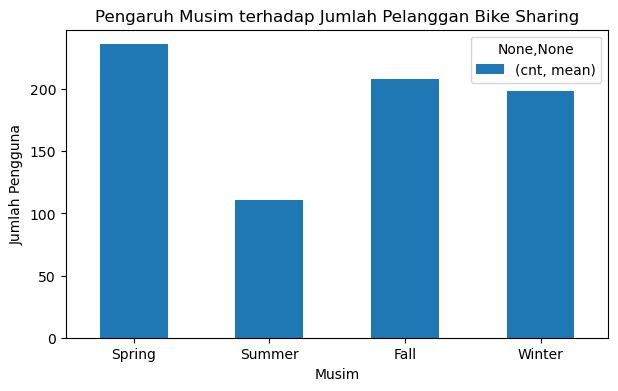

In [319]:
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
season_df.plot(kind='bar', figsize=(7,4))

plt.title("Pengaruh Musim terhadap Jumlah Pelanggan Bike Sharing")
plt.xticks(ticks=range(4), labels=season_labels, rotation=0)
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Musim")
plt.show()

insight:
1. musim panas memiliki rata-rata pelanggan tertinggi, berarti cuaca yang lebih cerah membuat orang lebih banyak bersepeda pada musim ini
2. musim dingin memiliki rata-rata paling rendah, berarti faktor cuaca seperti hujan, dingin, atau salju sangat mempengaruhi penggunaan sepeda.

2. pertnyaan kedua : "Bagaimana pola penggunaan sepeda antara pengguna casual dan registered berdasarkan jam dalam sehari? Apakah ada perbedaan signifikan dalam pola pemakaian mereka?"

/tmp/ipykernel_187370/3189895294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = hour_in_days_df.groupby("time_group")[["casual_hour", "registered_hour"]].sum()


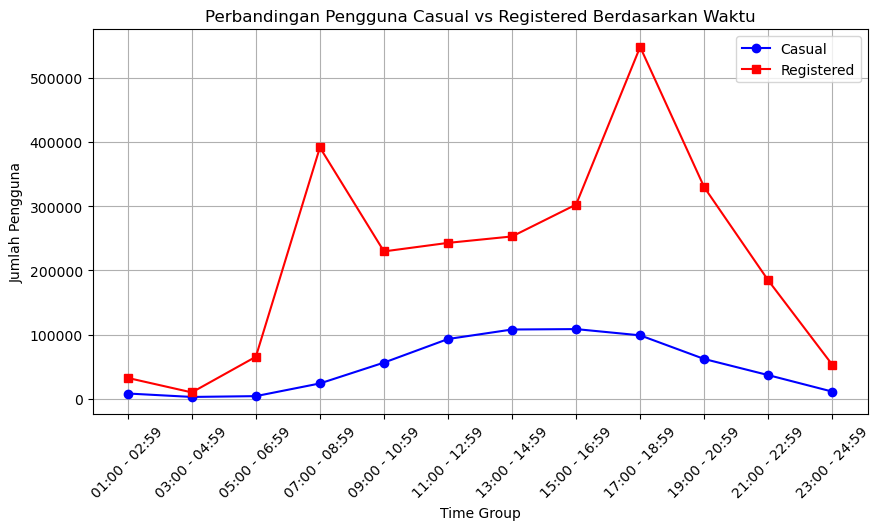

In [320]:
grouped_df = hour_in_days_df.groupby("time_group")[["casual_hour", "registered_hour"]].sum()

plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['casual_hour'], marker='o', linestyle='-', label='Casual', color='blue')
plt.plot(grouped_df.index, grouped_df['registered_hour'], marker='s', linestyle='-', label='Registered', color='red')

plt.title("Perbandingan Pengguna Casual vs Registered Berdasarkan Waktu", fontsize=12)
plt.xlabel("Time Group", fontsize=10)
plt.ylabel("Jumlah Pengguna", fontsize=10)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

insight:
1. Pengguna registered mulai meningkat sejak pagi hari dan mencapai puncaknya pada jam 07:00 - 08:59, yang kemungkinan besar berkaitan dengan jam berangkat kerja atau sekolah.
2. selain itu, pada saat sore hari, pengguna registered juga mengalami lonjakan yg cukup tinggi, hal ini sesuai dengan jam pulang kerja
3. pengguna registered cenderung mendominasi pada tiap jam ditiap harinya
4. Pengguna casual mencapai jumlah tertinggi pada jam 13:00 - 14:59, kemungkinan karena banyak orang menggunakan sepeda untuk rekreasi atau aktivitas santai di jam istirahat siang.

In [321]:
hour_in_days_df.to_csv("dashboard/main_data.csv", index=False)